In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import Image

# seaborn
import seaborn as sns

# 불필요한 경고 표시 생략
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
plt.rc('font', family='Malgun Gothic') 
plt.rcParams["figure.figsize"] = (12, 9)

# 0. Seaborn이 선호되는 이유

matplotlib으로 대부분의 시각화는 가능하지만 seaborn이 가지는 몇몇 장점들이 있다.

## 0-1. seaborn에서만 제공되는 통계 기반 plot
- 데이터 분석에서 특히 EDA를 할때 matplot으로는 여러 과정을 거쳐야 하는 그래프를 손쉽게 그릴 수 있는 경우가 많다.

In [3]:
# seaborn 실습용 내장 데이터셋
tips = sns.load_dataset("tips")

데이터의 min / max 그리고 그 사이의 분포를 표기하는 violinplot (box plot과 비슷)

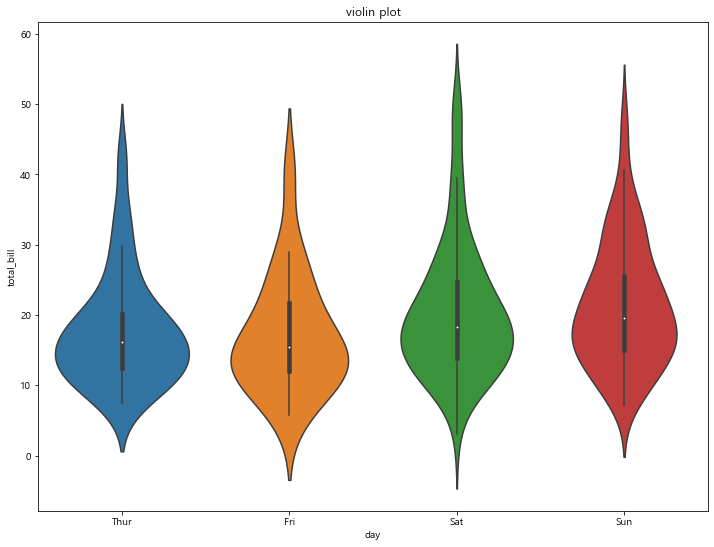

In [4]:
sns.violinplot(x="day", y="total_bill", data=tips)
plt.title('violin plot')
plt.show()

범주형 변수의 각 변수별 데이터 count를 표기해주는 countplot

In [5]:
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

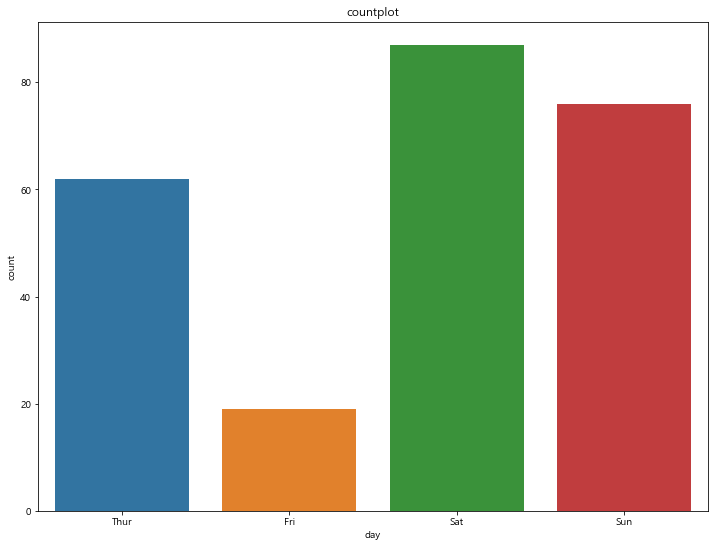

In [6]:
sns.countplot(tips['day']) # Thur ~ Sun
plt.title('countplot')
plt.show()

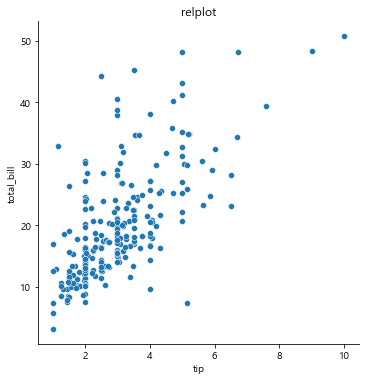

In [7]:
sns.relplot(x='tip', y='total_bill', data=tips)
plt.title('relplot')
plt.show()

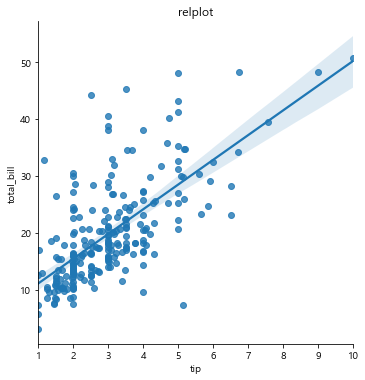

In [8]:
sns.lmplot(x='tip', y='total_bill', data=tips)
plt.title('relplot')
plt.show()

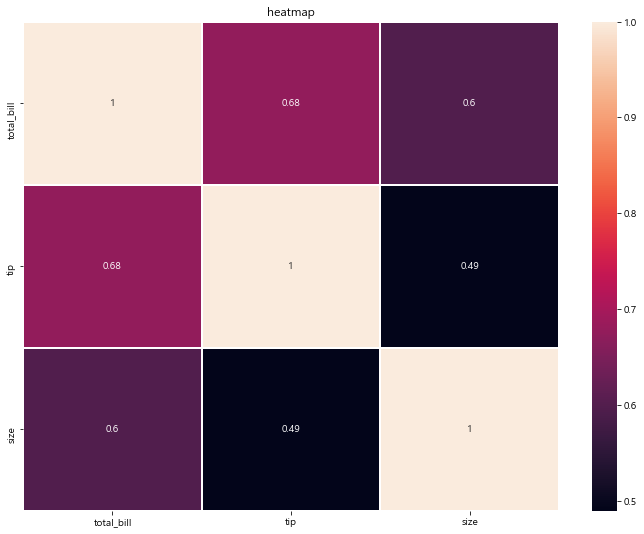

In [9]:
plt.title('heatmap')
sns.heatmap(tips.corr(), annot=True, linewidths=1)
plt.show()

## 0-2. Fancy한 스타일링

- 위의 그래프는 과정은 다소 복잡해도 matplotlib 으로 그려낼 수 있는 그래프들이다.

- seaborn이 matplolib보다 선호되는 기본적인 이유는 **default color**이 matplotlib보다 예쁘게 조합되기 때문이다.

- 때문에 기본 셋팅으로도 시각적으로 화려한 색감의 그래프를 손쉽게 얻을 수 있다.

matplotlib으로 default color로 bar plot을 그릴경우

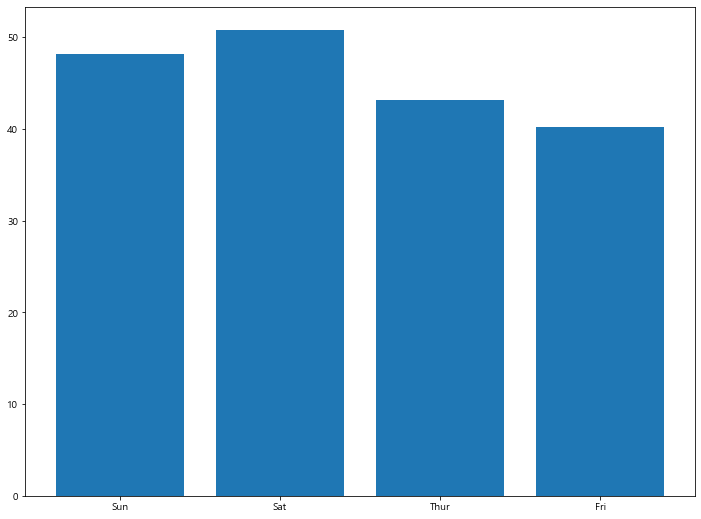

In [10]:
plt.bar(tips['day'], tips['total_bill'])
plt.show()

seaborn의 기본 색상 팔레트로 barplot을 그릴 경우

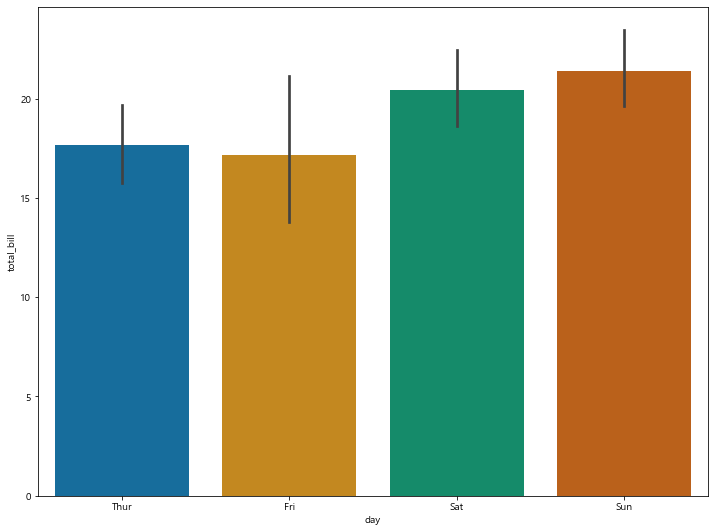

In [11]:
sns.barplot(x="day", y="total_bill", data=tips, palette='colorblind')
plt.show()

## 0-3. 컬러 팔레트

자세한 컬러팔레트는 **공식 도큐먼트**를 참조.

[Seaborn의 컬러팔레트](https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/)

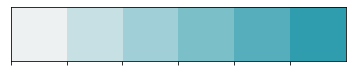

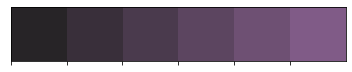

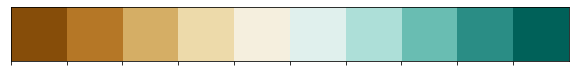

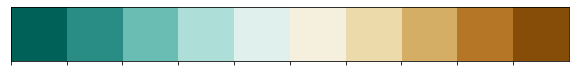

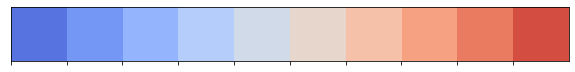

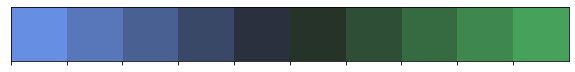

In [12]:
sns.palplot(sns.light_palette((210, 90, 60), input="husl"))
sns.palplot(sns.dark_palette("muted purple", input="xkcd"))
sns.palplot(sns.color_palette("BrBG", 10))
sns.palplot(sns.color_palette("BrBG_r", 10))
sns.palplot(sns.color_palette("coolwarm", 10))
sns.palplot(sns.diverging_palette(255, 133, l=60, n=10, center="dark"))

<AxesSubplot:xlabel='tip', ylabel='total_bill'>

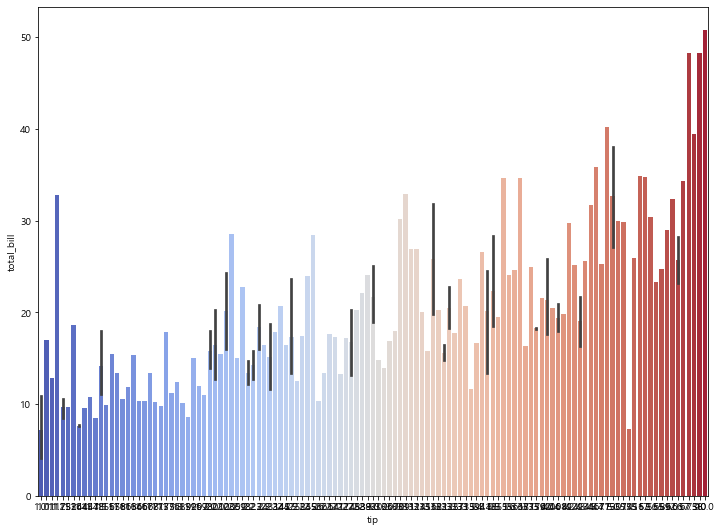

In [13]:
sns.barplot(x="tip", y="total_bill", data=tips, palette='coolwarm', )

<AxesSubplot:xlabel='tip', ylabel='total_bill'>

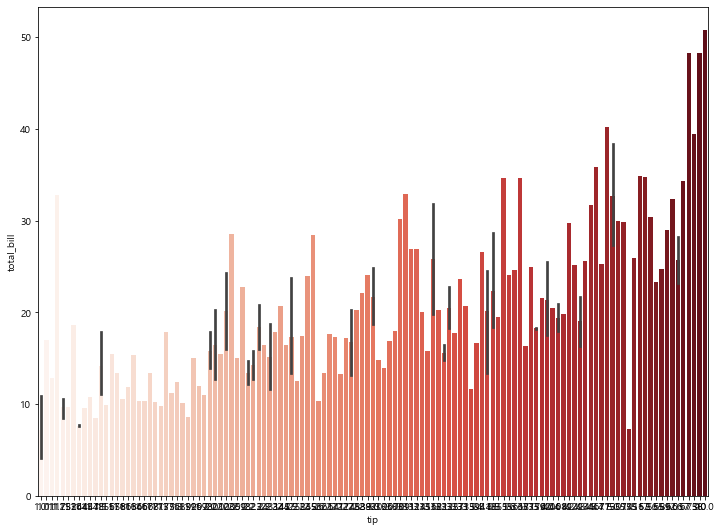

In [14]:
sns.barplot(x="tip", y="total_bill", data=tips, palette='Reds')

## 0-4. pandas 데이터프레임과 높은 호환성

In [15]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


matplotlib에서 컬럼을 별도로 x,y로 지정해줘야 하지만 sns에서는 DataFrame에서 바로 불러와서 사용 가능

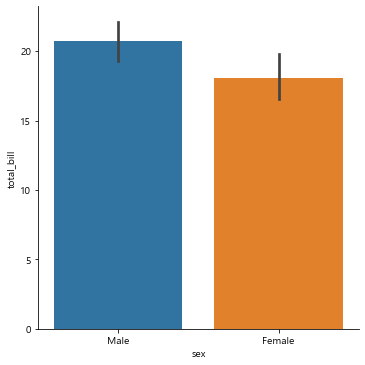

In [16]:
sns.catplot(x="sex", y="total_bill",
#             hue="smoker", 
            data=tips, 
            kind="bar")
plt.show()

`hue` 옵션으로 bar를 구분

* xtick, ytick, xlabel, ylabel을 알아서 생성해 준다.
* legend 까지 자동으로 생성해 준다.
* 뿐만 아니라, 신뢰 구간도 알아서 계산하여 생성한다.( bar plot내의 검은 선)
* matplotlib에서는 hue로 구분되는 데이터들은 별도로 생성을 하여 입력값으로 지정을 해주어야 하는데 그런 과정이 필요없다.

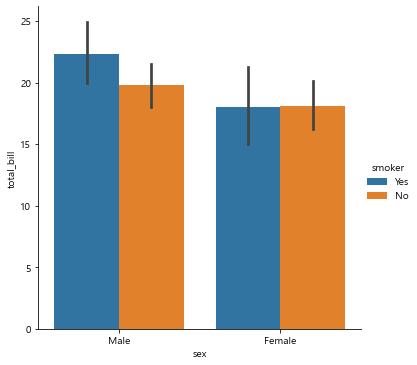

In [17]:
# 흡연자 여부로 bar plot을 구분하여 시각화 
sns.catplot(x="sex", y="total_bill",
            hue="smoker", 
            data=tips, 
            kind="bar")
plt.show()

`col`옵션 하나로 그래프 자체를 분할할 수도 있음

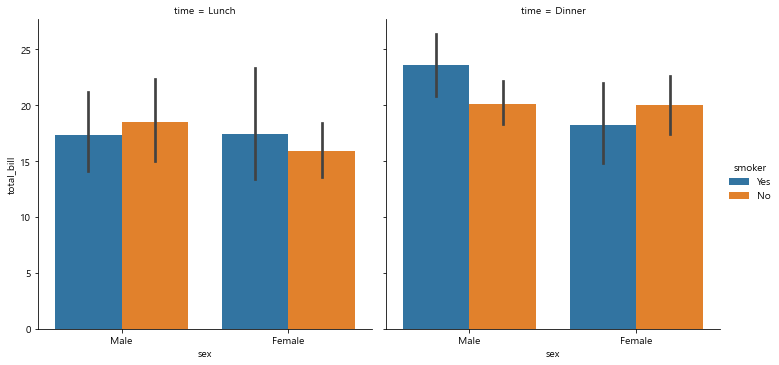

In [18]:
sns.catplot(x="sex", y="total_bill",
            hue="smoker", 
            col="time",
            data=tips, 
            kind="bar")
plt.show()

# 1. Scatterplot

## 1-1. x, y, colors, area 설정하기

* colors 는 임의 값을 color 값으로 변환한다.
* area는 점의 넓이를 나타냅니다. 값이 커질수록 넓이도 커진다.

In [19]:
x = np.random.rand(50)
y = np.random.rand(50)
colors = np.arange(50)
area = x * y * 1000

### matplot으로 scatter plot 그리기

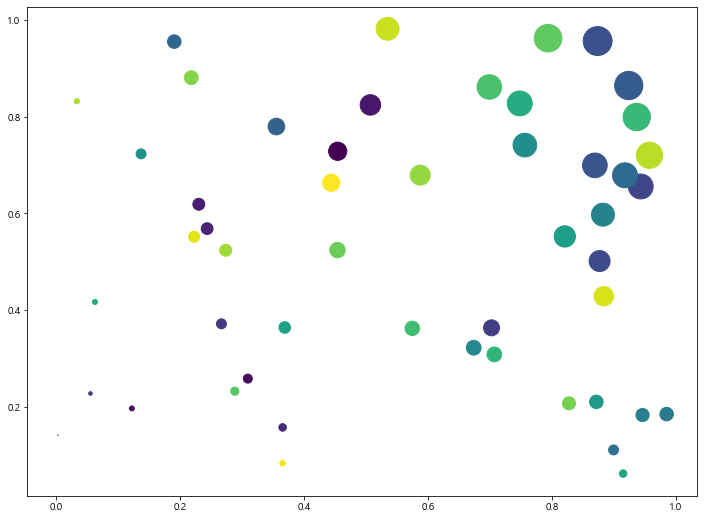

In [20]:
plt.scatter(x, y, s=area, c=colors)
plt.show()

### seaborn으로 scatter plot 그리기

* seaborn 에서는 `size`와 `sizes`를 동시에 지정해준다.
* `sizes` 옵션에서는 사이즈의 min, max를 명시해 준다.
* `hue`는 컬러 옵션이다.
* `palette`를 통해 seaborn이 제공하는 컬러풀한 palette 를 이용하면 된다.

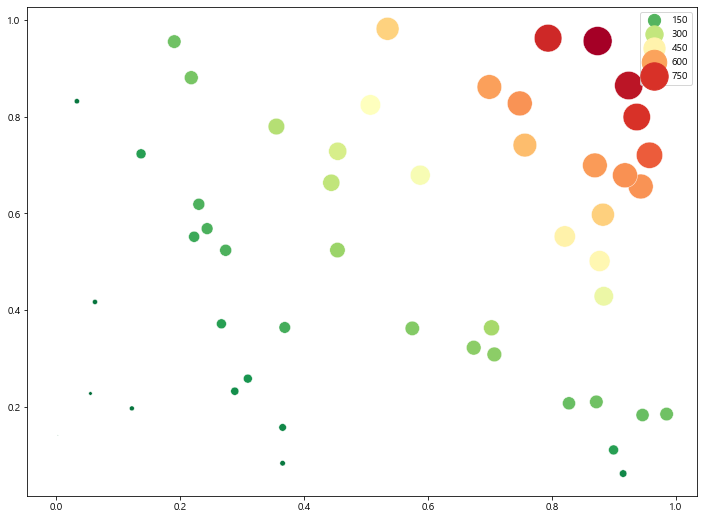

In [21]:
sns.scatterplot(x, y, size=area, sizes=(area.min(), area.max()), hue=area, palette='RdYlGn_r')
plt.show()

**palette 설정 Tip**

---
- palette의 명칭은 복잡하기도 하고, 그렇다고 매번 사용할때마다 seaborn 문서를 보는 것도 번거롭다.
- 이를 보완 하는 방법은 `일부러 잘못된 입력을 하는 것` 이다.
- palette 옵션에 잘못된 값을 입력하면 아래와 같이 에러 메세지에 입력가능한 palette값들이 표기된다.
- 해당값 중 원하는 것을 복사해서 사용하면 된다.

---
![image](https://user-images.githubusercontent.com/74717033/127774907-859e3315-62a3-413e-b816-04a54e366c50.png)

## 1-2. cmap과 alpha

* cmap에 컬러를 지정하면, 컬러 값을 모두 같게 가져갈 수도 있다.
* alpha값은 투명도를 나타내며 0 ~ 1 사이의 값을 지정해 줄 수 있으며, 0에 가까울 수록 투명한 값을 가진다.

### matplotlib으로 그리는 alpha별 scatter plot

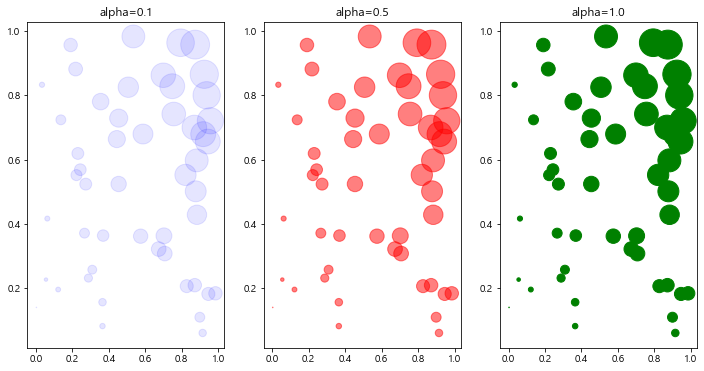

In [22]:
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.scatter(x, y, s=area, c='blue', alpha=0.1)
plt.title('alpha=0.1')

plt.subplot(132)
plt.title('alpha=0.5')
plt.scatter(x, y, s=area, c='red', alpha=0.5)

plt.subplot(133)
plt.title('alpha=1.0')
plt.scatter(x, y, s=area, c='green', alpha=1.0)

plt.show()

### seaborn으로 그리는 alpha별 scatter plot

- 기본적으로 subplot은 matplot의 도움을 받아야 한다.

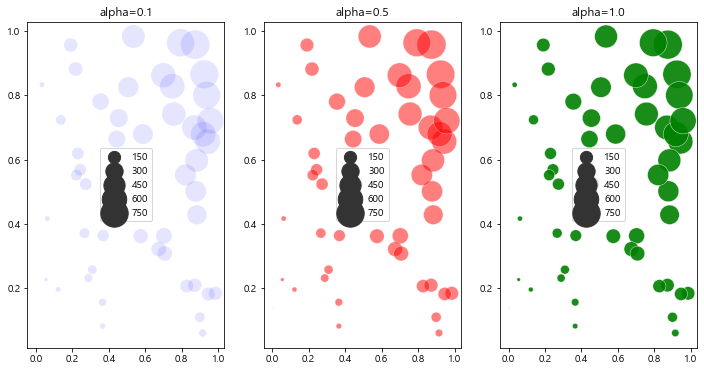

In [23]:
plt.figure(figsize=(12, 6))

plt.subplot(131)
sns.scatterplot(x, y, size=area, sizes=(area.min(), area.max()), color='blue', alpha=0.1)
plt.title('alpha=0.1')

plt.subplot(132)
plt.title('alpha=0.5')
sns.scatterplot(x, y, size=area, sizes=(area.min(), area.max()), color='red', alpha=0.5)

plt.subplot(133)
plt.title('alpha=1.0')
sns.scatterplot(x, y, size=area, sizes=(area.min(), area.max()), color='green', alpha=0.9)

plt.show()

# 2. Barplot, Barhplot

1개의 canvas 안에 다중 그래프 그리기

## 2-1. 기본 Barplot 그리기

### matplotlib 으로 그리는 barplot

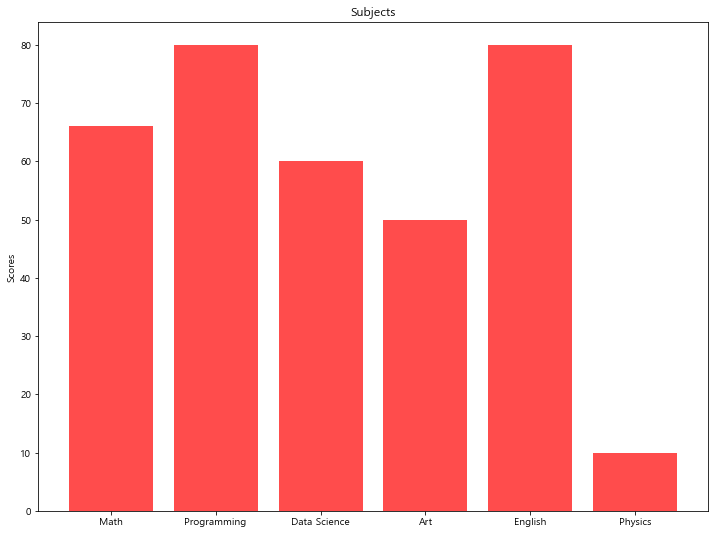

In [24]:
x = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
y = [66, 80, 60, 50, 80, 10]

plt.bar(x, y, align='center', alpha=0.7, color='red')

plt.xticks(x)
plt.ylabel('Scores')
plt.title('Subjects')

plt.show()

### seaborn 으로 그리는 barplot

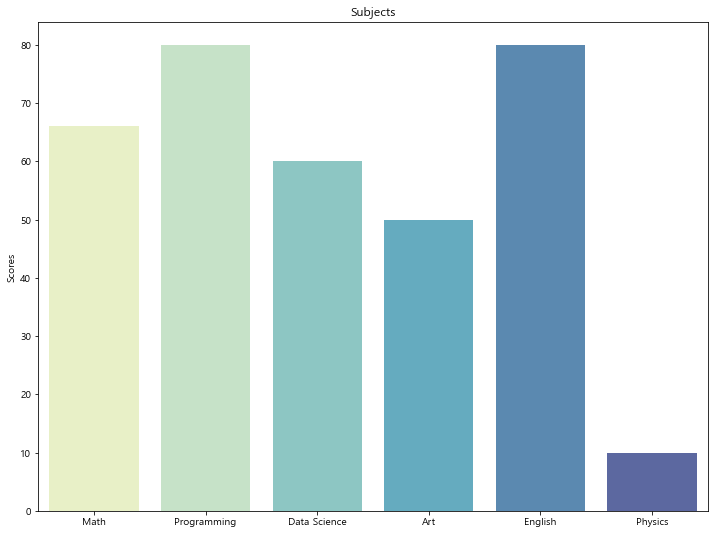

In [25]:
x = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
y = [66, 80, 60, 50, 80, 10]

sns.barplot(x, y, alpha=0.8, palette='YlGnBu')

plt.ylabel('Scores')
plt.title('Subjects')
plt.show()

## 2-2. 기본 Barhplot 그리기

### matplotlib 으로 그리는 barplot

barh 함수에서는 **xticks로 설정**했던 부분을 **yticks로 변경**한다.

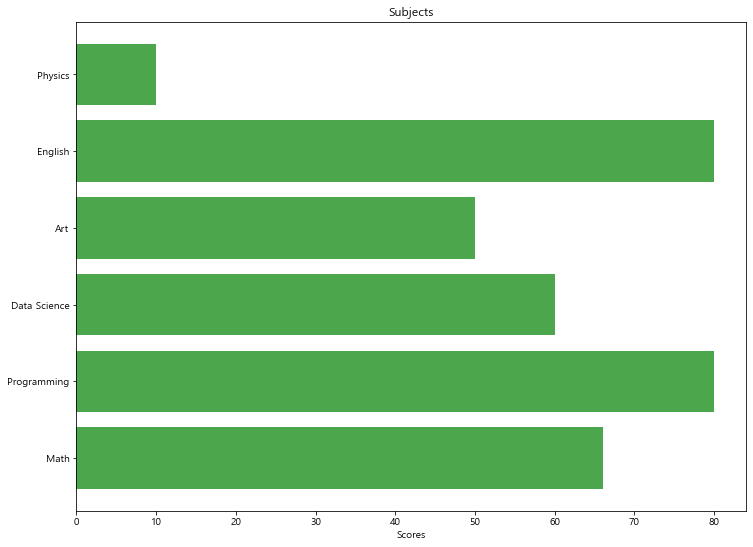

In [26]:
x = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
y = [66, 80, 60, 50, 80, 10]

plt.barh(x, y, align='center', alpha=0.7, color='green')
plt.yticks(x) # ytick을 x로 지정
plt.xlabel('Scores')
plt.title('Subjects')

plt.show()

### seaborn 으로 그리는 barhplot

- matplotlib처럼 plt.bar를 plt.barh 로 변경하지 않는다.
- 동일한 sns.barplot() 함수에 x축과 y축의 입력순서를 바꿔준다.

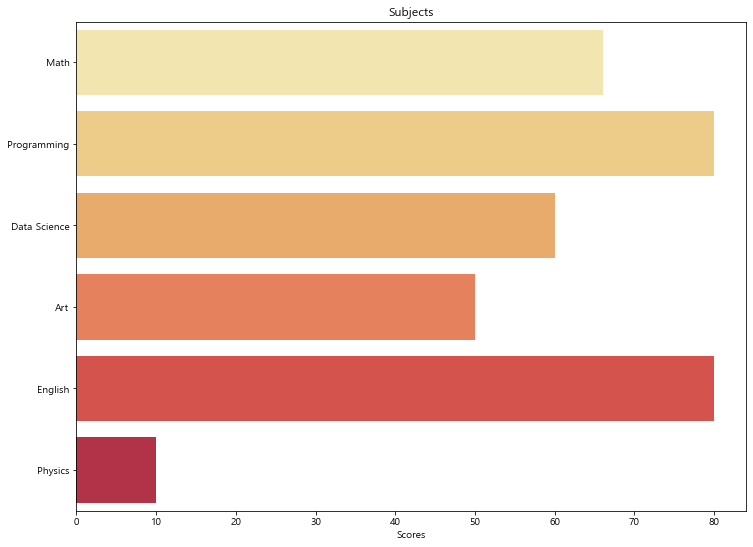

In [27]:
x = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
y = [66, 80, 60, 50, 80, 10]

ax = sns.barplot(y, x, alpha=0.9, palette='YlOrRd')

plt.xlabel('Scores')
plt.title('Subjects')

plt.show()

## Barplot에서 비교 그래프 그리기

### matplotlib 에서 그리는 barplot의 비교그래프 (수직)

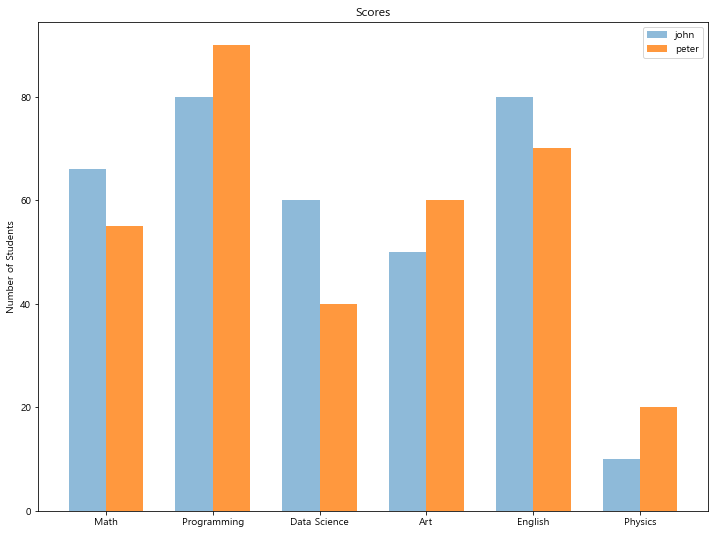

In [28]:
x_label = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
x = np.arange(len(x_label))
y_1 = [66, 80, 60, 50, 80, 10]
y_2 = [55, 90, 40, 60, 70, 20]

# 넓이 지정
width = 0.35

# subplots 생성
fig, axes = plt.subplots()

# 넓이 설정
axes.bar(x - width/2, y_1, width, align='center', alpha=0.5)
axes.bar(x + width/2, y_2, width, align='center', alpha=0.8)

# xtick 설정
plt.xticks(x)
axes.set_xticklabels(x_label)
plt.ylabel('Number of Students')
plt.title('Scores')

plt.legend(['john', 'peter'])

plt.show()

### matplotlib 에서 그리는 barplot의 비교그래프 (수평=barh)

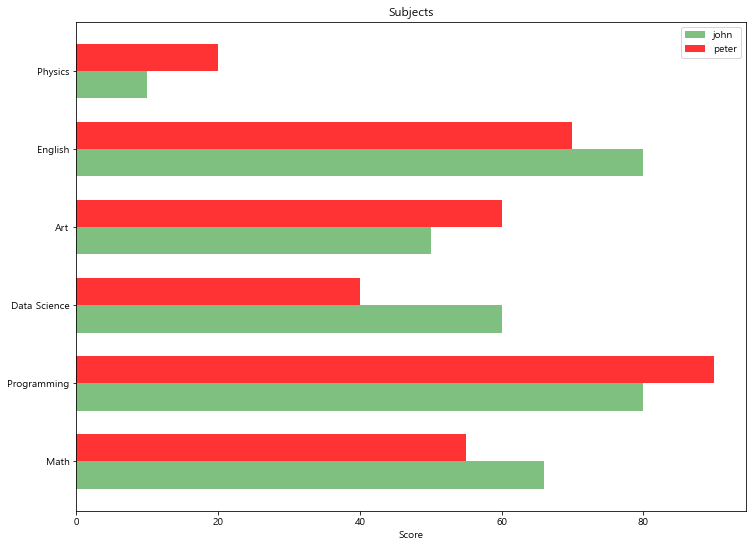

In [29]:
x_label = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
x = np.arange(len(x_label))
y_1 = [66, 80, 60, 50, 80, 10]
y_2 = [55, 90, 40, 60, 70, 20]

# 넓이 지정
width = 0.35

# subplots 생성
fig, axes = plt.subplots()

# 넓이 설정
axes.barh(x - width/2, y_1, width, align='center', alpha=0.5, color='green')
axes.barh(x + width/2, y_2, width, align='center', alpha=0.8, color='red')

# xtick 설정
plt.yticks(x)
axes.set_yticklabels(x_label)
plt.xlabel('Score')
plt.title('Subjects')

plt.legend(['john', 'peter'])

plt.show()

### seaborn 에서 그리는 barplot의 비교그래프

- 위에서 말한 장점처럼  seaborn은 DataFrame과 매우 친숙하다.
- matplotlib과 같이 임의의 데이터를 기반으로 시각화를 할때는 matplitlib이 더욱 유용하다.
- seaborn으로 동일한 구현을 하려면 일단 임의 생성한 값들을 DataFrame화 해야 한다.

- 대신 seaborn 에서는 `hue` 옵션으로 매우 쉽게 비교 **barplot**을 그릴 수 있다.

In [30]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


- titanic의 plcass라는 컬럼은 타이타닉이라는 배에 승선한 고객의 등급을 3개로 나눈 컬럼이다.
- 즉, 범주형 변수로써 pclass는 1, 2, 3 이라는 3개의 값이 있다.
- seaborn에서 hue 옵션은 x,y에 입력한 데이터를 어떤 기준으로 나눌건지를 지정하는 옵션이다.
- 즉 아래의 그래프는, 성별(x) 대비 생존자(y)의 수를 pclass별로 비교한 그래프이다.
---

- seaborn으로 비교그래프를 그릴때는 matplotlib 처럼 , 각 바의 크기를 임의로 2로 나누는 등 따로 지정할 필요가 없다.
- 마찬가지로 각 bar의 넓이도 지정할 필요가 없다.


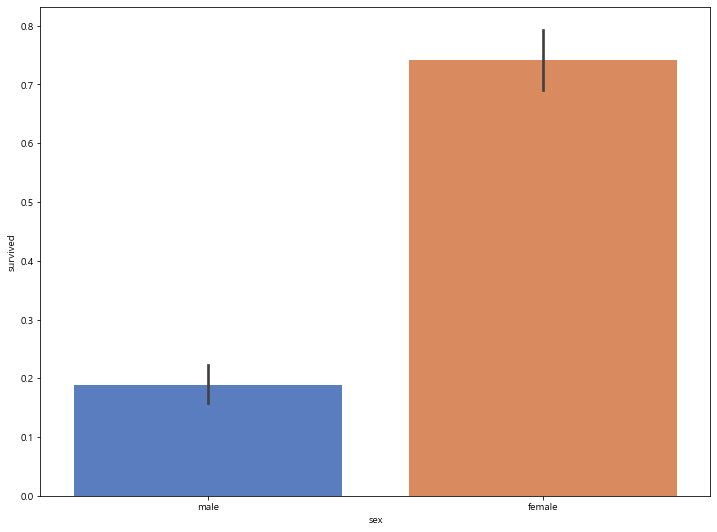

In [31]:
# hue가 없는 일반 barplot with seaborn

sns.barplot(x='sex', y='survived', data=titanic, palette="muted")
plt.show()

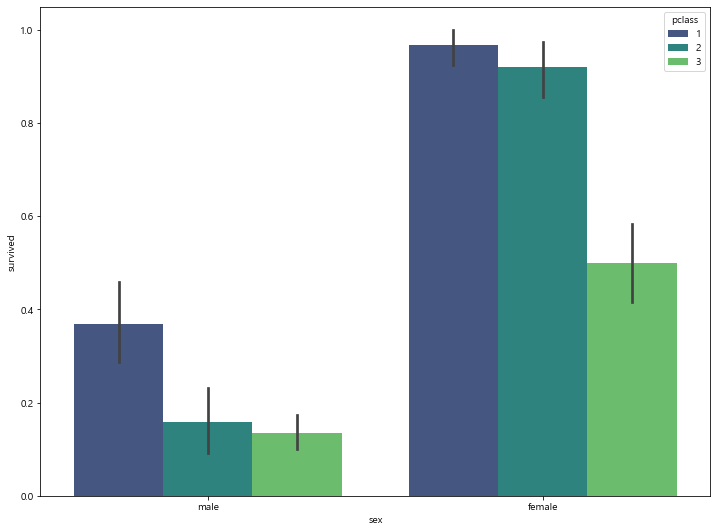

In [32]:
# hue에 pclass를 지정한 경우

sns.barplot(x='sex', y='survived', hue='pclass', data=titanic, palette="viridis")
plt.show()

# 3. Line Plot

## 3-1. 기본 lineplot 그리기

### matplotlib 으로 그리는 lineplot

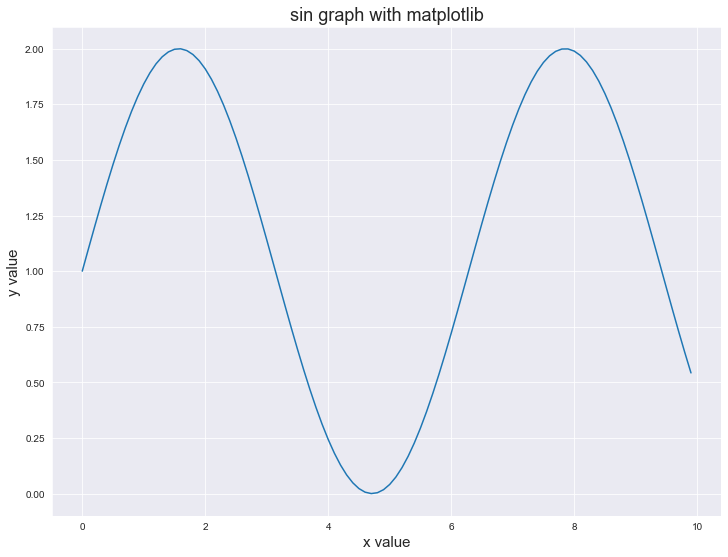

In [33]:
x = np.arange(0, 10, 0.1)
y = 1 + np.sin(x)

#seaborn의 set_style적용
sns.set_style("darkgrid")

plt.plot(x, y)

plt.xlabel('x value', fontsize=15)
plt.ylabel('y value', fontsize=15)
plt.title('sin graph with matplotlib', fontsize=18)

plt.show()

### seaborn 으로 그리는 lineplot

- lineplot()이라는 함수로 쉽게 구현 가능
- set_style() 로 grid를 따로 설정할 수 있다. (whitegrid, darkgrid, white, dark, ticks) 
- sns.set_style() 는 matplotlib에도 동일하게 적용 가능하다.

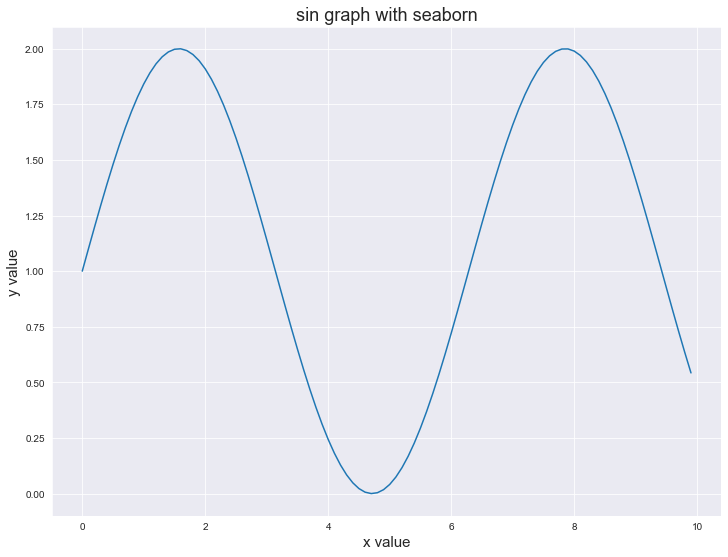

In [34]:
# x = np.arange(0, 10, 0.1)
# y = 1 + np.sin(x)

sns.set_style("darkgrid")

sns.lineplot(x, y)

plt.xlabel('x value', fontsize=15)
plt.ylabel('y value', fontsize=15)
plt.title('sin graph with seaborn', fontsize=18)

plt.show()

## 3-2. 2개 이상의 그래프 그리기

### matplotlib 으로 lineplot 2개 이상 그리기

* color: 컬러 옵션
* alpha: 투명도 옵션

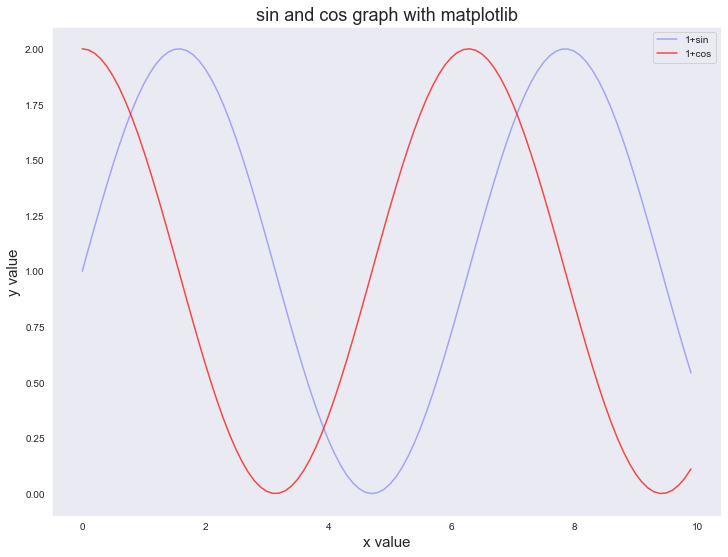

In [35]:
# 데이터 생성
x = np.arange(0, 10, 0.1)
y_1 = 1 + np.sin(x) #sine값
y_2 = 1 + np.cos(x) #cosine 값

# plot에 데이터 각각 입력
plt.plot(x, y_1, label='1+sin', color='blue', alpha=0.3) #plot1
plt.plot(x, y_2, label='1+cos', color='red', alpha=0.7) # plot2

# label & Title 설정
plt.xlabel('x value', fontsize=15)
plt.ylabel('y value', fontsize=15)
plt.title('sin and cos graph with matplotlib', fontsize=18)


# Grid & Legend 표시
plt.grid()
plt.legend()

# 시각화
plt.show()

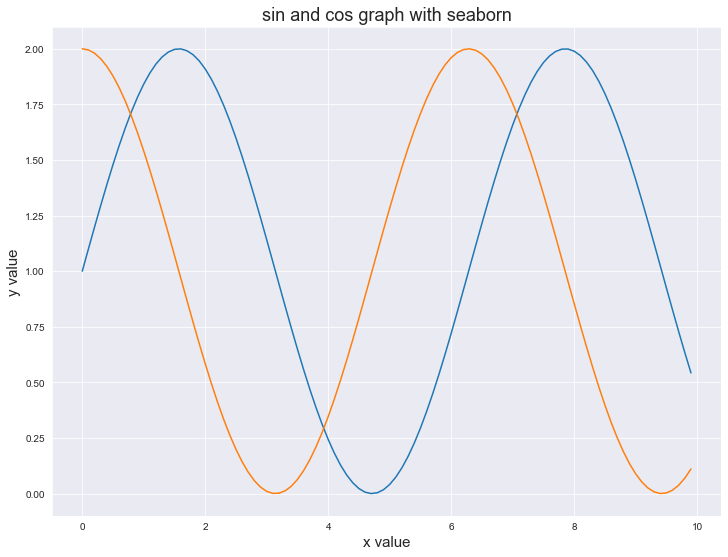

In [36]:
# matplotlib과 동일 데이터
# x = np.arange(0, 10, 0.1)
# y_1 = 1 + np.sin(x) #sine값
# y_2 = 1 + np.cos(x) #cosine 값

sns.set_style("darkgrid")

sns.lineplot(x, y_1)
sns.lineplot(x, y_2)

# label & Title 설정
plt.xlabel('x value', fontsize=15)
plt.ylabel('y value', fontsize=15)
plt.title('sin and cos graph with seaborn', fontsize=18)


# Grid & Legend 표시
#plt.grid()
#plt.legend()

# 시각화
plt.show()

### 3-3. 마커 스타일링

* marker: 마커 옵션

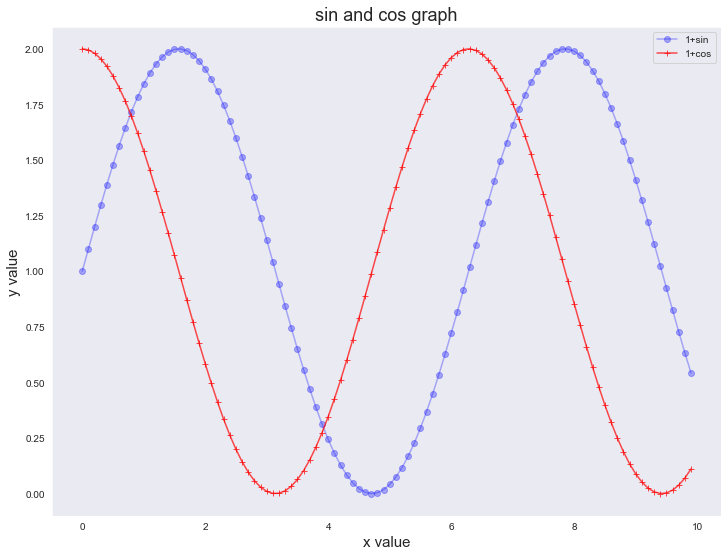

In [37]:
x = np.arange(0, 10, 0.1)
y_1 = 1 + np.sin(x)
y_2 = 1 + np.cos(x)

plt.plot(x, y_1, label='1+sin', color='blue', alpha=0.3, marker='o')
plt.plot(x, y_2, label='1+cos', color='red', alpha=0.7, marker='+')

plt.xlabel('x value', fontsize=15)
plt.ylabel('y value', fontsize=15)
plt.title('sin and cos graph', fontsize=18)

plt.grid()
plt.legend()

plt.show()

### 3-4 라인 스타일 변경하기

* linestyle: 라인 스타일 변경 옵션

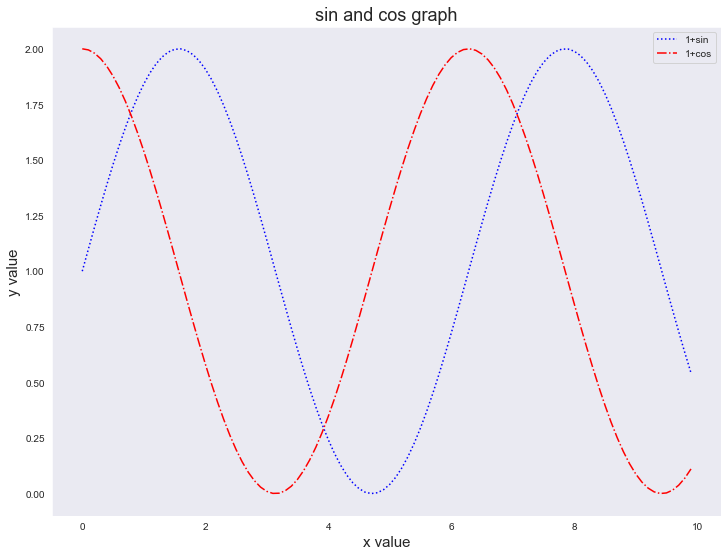

In [38]:
x = np.arange(0, 10, 0.1)
y_1 = 1 + np.sin(x)
y_2 = 1 + np.cos(x)

plt.plot(x, y_1, label='1+sin', color='blue', linestyle=':')
plt.plot(x, y_2, label='1+cos', color='red', linestyle='-.')

plt.xlabel('x value', fontsize=15)
plt.ylabel('y value', fontsize=15)
plt.title('sin and cos graph', fontsize=18)

plt.grid()
plt.legend()

plt.show()

## 4. Areaplot (Filled Area)

Seaborn에서는 **area plot을 지원하지 않는다.**

`matplotlib`을 활용하여 구현해야 한다.

## 5. Histogram

### 5-1. 기본 Histogram 그리기

**matplotlib** 으로 그리는 Histogram

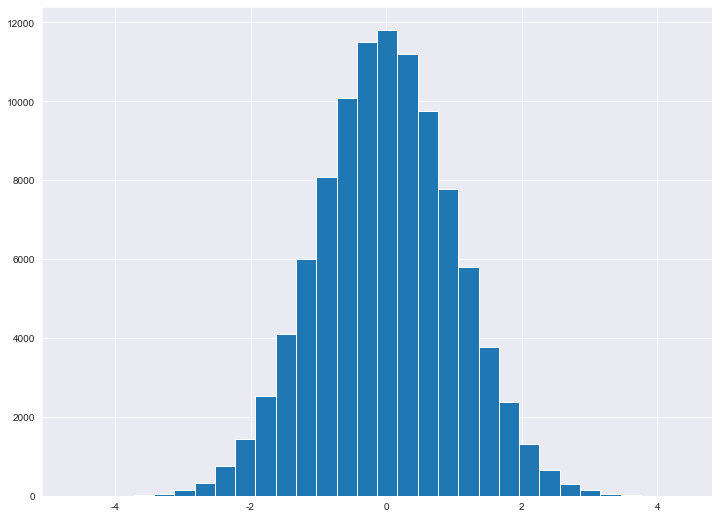

In [39]:
N = 100000
bins = 30

x = np.random.randn(N)

plt.hist(x, bins=bins)

plt.show()

**seaborn** 으로 그리는 Histogram : 'distplot'

- distplot에는 3가지 옵션으로 3종류의 그래프를 그릴 수 있다.
- 옵션 1) kde = False, hist = True : 일반적인 matplotlib의 히스토그램
- 옵션 2) kde = True, hist = False : 일반적 histogram 을 density 로 표현
- 옵션 3) kde = True, hist = True : 일반적 histogram 과 density과 동시에 표현 
- 추가옵션으로 vertical = True 를 하면 x,y축 반전이 된다. (bar의 barh와 동일)

* **옵션 1) kde = False, hist=True**
* y축이 count이다. (histogram)

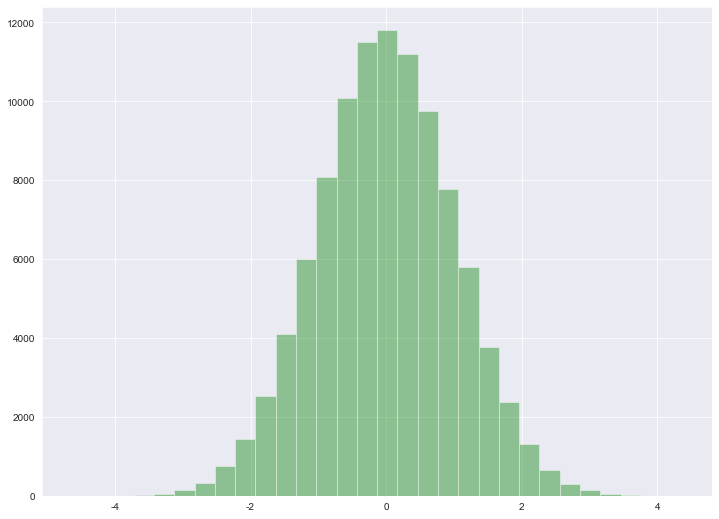

In [40]:
sns.distplot(x, bins=bins, kde=False, hist=True, color='g');

옵션 2) kde = True, hist=False

* `kde`을 **True**로 설정해주면, **Density(밀도)**가 Y축에 표기 된다.
* Density(밀도)로 표기되기 때문에 histogram의 bar형이 아닌 line형으로 표현된다.

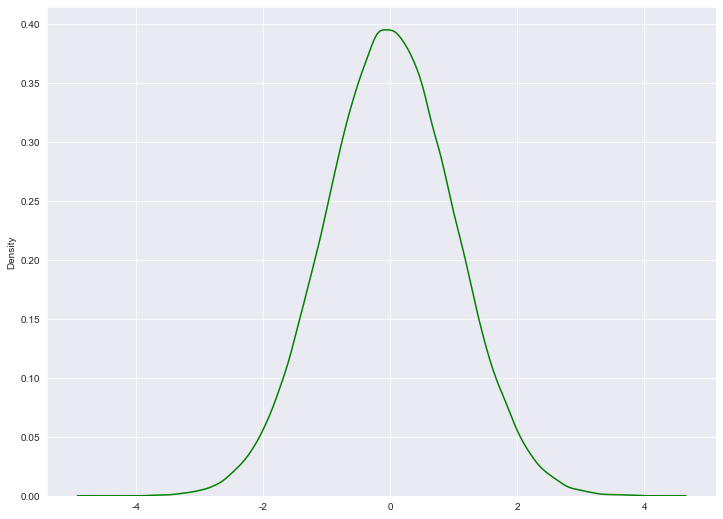

In [41]:
sns.distplot(x, bins=bins, kde=True, hist=False, color='g');

- 옵션 3) kde = True, hist = True : 일반적 histogram 과 density과 동시에 표현 
- 공통 옵션 vertical 을 적용할 수도 있다.

<AxesSubplot:xlabel='Density'>

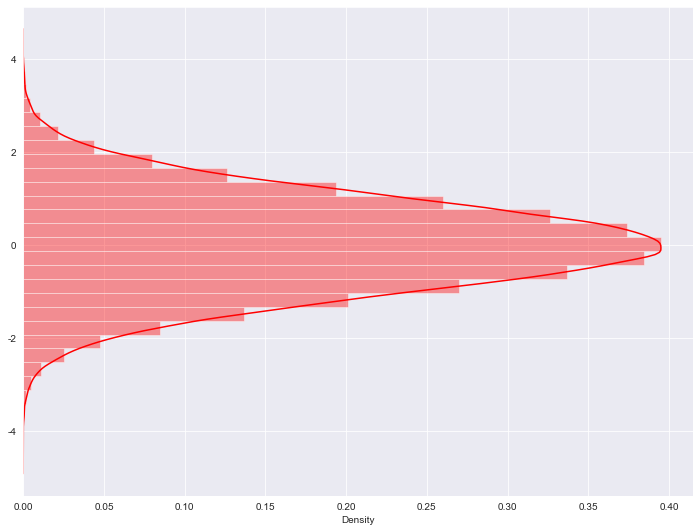

In [42]:
sns.distplot(x, bins=bins, kde=True, hist=True, vertical=True, color='r')

* sharey: y축을 다중 그래프가 share
* tight_layout: graph의 패딩을 자동으로 조절해주어 fit한 graph를 생성

### 5-2. 다중 Histogram 그리기

- 기본적으로는 matplotlib과 비슷하다. 
- matplotlib의 subplot을 통해 캔버스를 구성해준 뒤 distplot을 누적해서 입력해준다.

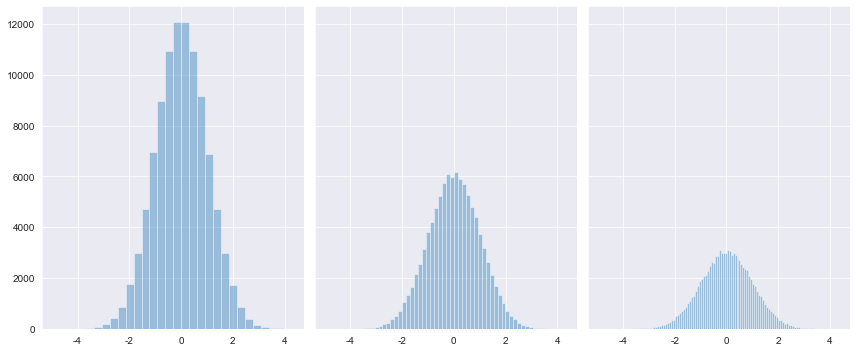

In [43]:
N = 100000
bins = 30

x = np.random.randn(N)

fig, ax = plt.subplots(1, 3, 
                        sharey=True, 
                        tight_layout=True
                       )

fig.set_size_inches(12, 5)

# 기존 matplotlib에서 그릴때
# axs[0].hist(x, bins=bins) # bins = 30
# axs[1].hist(x, bins=bins*2) # bins = 30*2
# axs[2].hist(x, bins=bins*4) # bins = 30*4


# seaborn에서 그릴때
sns.distplot(x, bins=bins, kde=False, hist=True, ax=ax[0])
sns.distplot(x, bins=bins*2, kde=False, hist=True, ax=ax[1])
sns.distplot(x, bins=bins*4, kde=False, hist=True, ax=ax[2])

plt.show()

### 5-3. Y축에 Density 표기

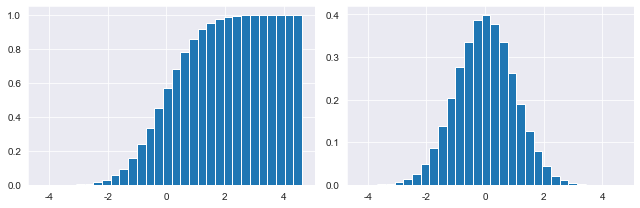

In [44]:
N = 100000
bins = 30

x = np.random.randn(N)

fig, axs = plt.subplots(1, 2, 
                        tight_layout=True
                       )
fig.set_size_inches(9, 3)

# density=True 값을 통하여 Y축에 density를 표기할 수 있다.
axs[0].hist(x, bins=bins, density=True, cumulative=True)
axs[1].hist(x, bins=bins, density=True)

plt.show()

## 6. Pie Chart 

>Seaborn에서는 **pie plot을 지원하지 않는다.**

>`matplotlib`을 활용하여 구현해야 한다.

## 7. Box Plot

샘플 데이터를 생성한다.

In [45]:
# 샘플 데이터 생성
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

### 7-1 기본 박스플롯 생성

<AxesSubplot:>

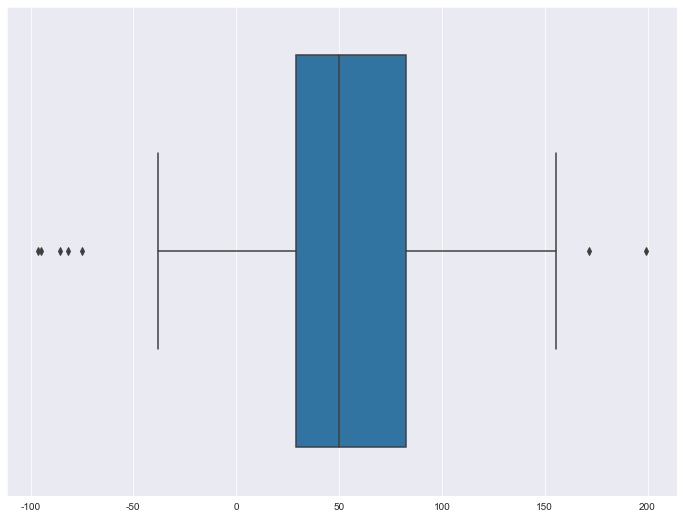

In [46]:
sns.boxplot(data, orient='v')

### 7-2. 다중 박스플롯 생성

### matplotlib에서 다중 박스플롯 그리기

In [47]:
# 샘플 데이터 생성
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d2 = np.concatenate((spread, center, flier_high, flier_low))


spread = np.random.rand(50) * 100
center = np.ones(25) * 30
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d3 = np.concatenate((spread, center, flier_high, flier_low))


#data.shape = (-1, 1)
#d2.shape = (-1, 1)
#d3.shape = (-1, 1)

data = [data, d2, d3]

**boxplot()**으로 매우 쉽게 생성할 수 있다.

다중 그래프 생성을 위해서는 data 자체가 **2차원으로 구성**되어 있어야 한다.

row와 column으로 구성된 DataFrame에서 Column은 X축에 Row는 Y축에 구성된다고 이해하시면 된다.

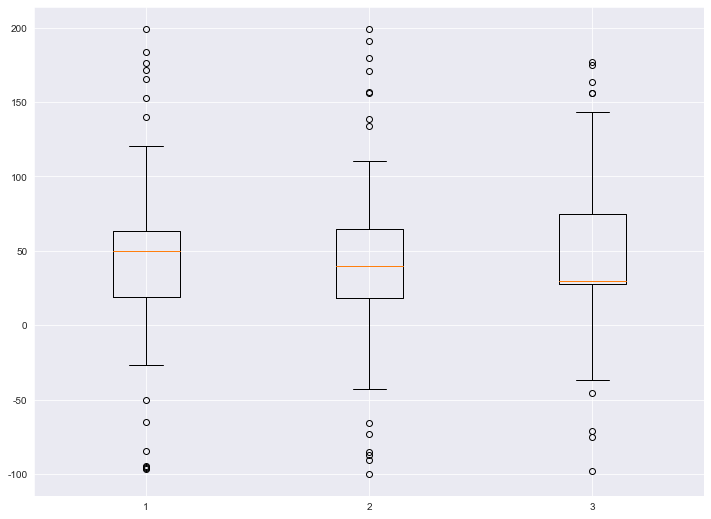

In [48]:
plt.boxplot(data)
plt.show()

### seabron 에서 다중 박스플롯 그리기

seaborn에서 boxplot을 그릴 때는DataFrame을 가지고 그릴 때 주로 활용한다. 

**barplot**과 마찬가지로, 용도에 따라 적절한 라이브러리를 사용한다.

**실전 tip.**
* 그래프를 임의로 그려야 하는 경우 -> `matplotlib`
* DataFrame을 가지고 그리는 경우 -> `seaborn`

seaborn 에서는 `hue` 옵션으로 매우 쉽게 비교 **boxplot**을 그릴 수 있다.

In [49]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


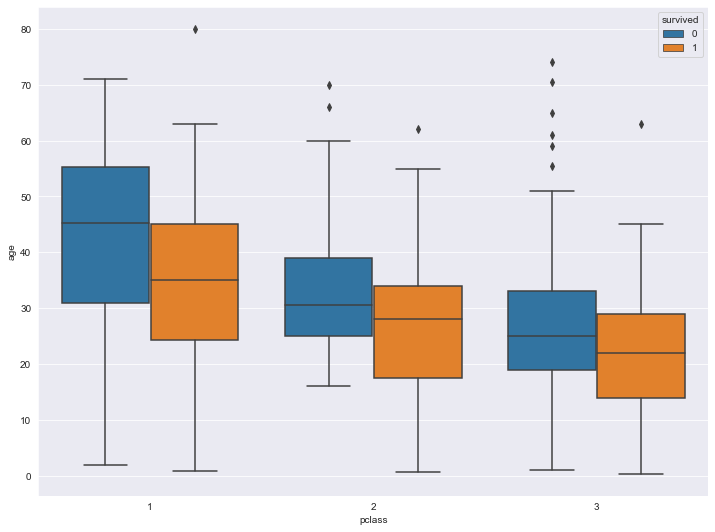

In [50]:
sns.boxplot(x='pclass', y='age', hue='survived', data=titanic)
plt.show()

### 7-3. Box Plot 축 바꾸기

**vert=False**  옵션을 통해 표시하고자 하는 축을 바꿀 수 있다.

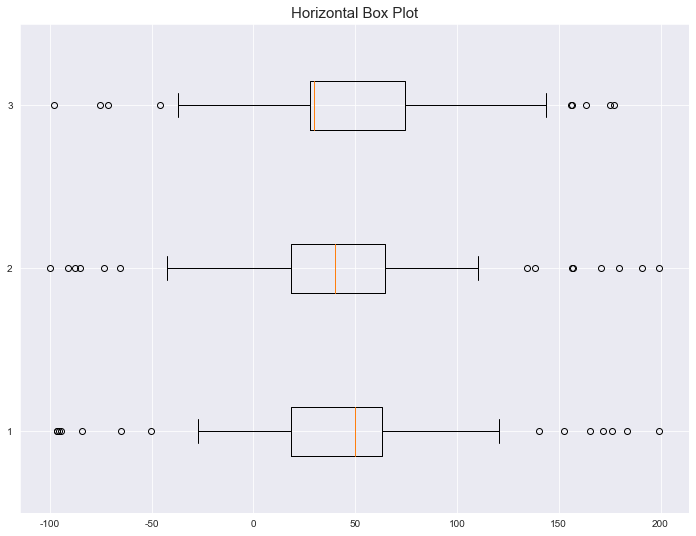

In [51]:
plt.title('Horizontal Box Plot', fontsize=15)
plt.boxplot(data, vert=False)

plt.show()

### 7-4. Outlier 마커 심볼과 컬러 변경

In [52]:
outlier_marker = dict(markerfacecolor='r', marker='D')

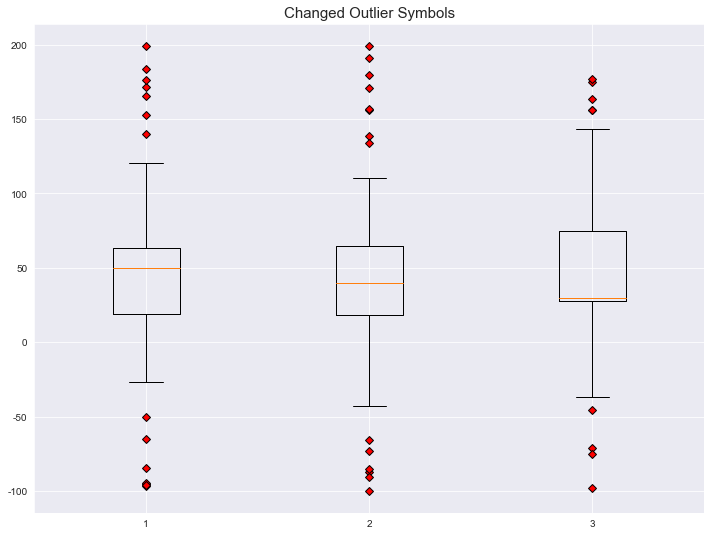

In [53]:
plt.title('Changed Outlier Symbols', fontsize=15)
plt.boxplot(data, flierprops=outlier_marker)

plt.show()

### References

[Matplotlib Document](https://matplotlib.org/)

[pyplot Document](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)

[seaborn Document](https://seaborn.pydata.org/)

[테디노트](https://teddylee777.github.io/visualization/seaborn-tutorial-1)